In [ ]:
print('-'*100)
print('Ciencia de Datos para la Toma de Decisiones - Luis Carrillo')
print('-'*100)

----------------------------------------------------------------------------------------------------
Ciencia de Datos para la Toma de Decisiones - Luis Carrillo
----------------------------------------------------------------------------------------------------


** **texto en negrita**Modelo** Predictivo para la Empresa Servicios Tecnologicos LYD utilizando la fuente de datos "Amazon's Top 100 Best Selling Books list from 2010 to 2020"

In [ ]:
import pandas as pd

Se utiliza para abrir un archivo .csv en Python


In [ ]:
amazon = pd.read_csv('data/Amazon.csv')

In [ ]:
amazon

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...
1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


Carga y muestra toda la información del dataset el cual contiene los 100 productos más vendidos de Amazon por categoría.

In [ ]:
amazon.columns

Index(['Year', 'Rank', 'Book_Title', 'Author', 'Rating', 'Num_Customers_Rated',
       'Price'],
      dtype='object')

Muestra las 7 columnas que clasifican el dataset separadas por coma.

In [ ]:
amazon.describe

<bound method NDFrame.describe of       Year  Rank  ... Num_Customers_Rated  Price
0     2010     1  ...                8475  17.24
1     2010     2  ...               11516   9.99
2     2010     3  ...                2201  17.80
3     2010     4  ...               14772  14.97
4     2010     5  ...                7949   0.02
...    ...   ...  ...                 ...    ...
1089  2020    96  ...               13775  10.49
1090  2020    97  ...                7923  20.98
1091  2020    98  ...                9455   6.99
1092  2020    99  ...               16340   5.68
1093  2020   100  ...               24240  17.98

[1094 rows x 7 columns]>

In [ ]:
amazon_reducido = amazon[amazon['Rating']>=4.5] #filtrar los mayores igual a 4.5
amazon_reducido = amazon_reducido[amazon_reducido['Rating']<=5.0] #filtra los menores igual a 5
amazon_reducido.describe()

,Year,Rank,Rating,Num_Customers_Rated,Price
count,919.000000,919.000000,919.000000,919.000000,919.000000
mean,2015.268770,50.544070,4.704897,14724.427639,10.329151
std,3.150304,28.844523,0.120944,14295.872457,11.943173
min,2010.000000,1.000000,4.500000,4.000000,0.020000
25%,2013.000000,26.000000,4.600000,5358.500000,2.480000
50%,2015.000000,50.000000,4.700000,11053.000000,8.390000
75%,2018.000000,76.000000,4.800000,20403.500000,14.990000
max,2020.000000,100.000000,4.900000,126619.000000,152.000000


En este caso se filtra para solo tener información sobre los productos que tienen un rating comprendido entre 4.5 y 4.9 estrellas.

El resultado nos indica que de un total de 1094 productos son 919 los que cumplen con este criterio y la media del rating es de 4.71 estrellas sobre 5.0

In [ ]:
len(amazon)-len(amazon_reducido)

175

En relación a lo anterior, indica la cantidad total de productos menos la cantidad que cumplen con el criterio de tener una puntuación superior a 4.5 estrellas. Es decir la cantidad de productor que quedan por fuera al momento de filtrar.

In [ ]:
amazon[['Book_Title', 'Rating']]

,Book_Title,Rating
0,The Girl Who Kicked the Hornet's Nest (Millenn...,4.7
1,The Girl with the Dragon Tattoo (Millennium Se...,4.4
2,Decision Points,4.6
3,The Help,4.8
4,The Girl Who Played with Fire (Millennium Series),4.7
...,...,...
1089,"Relationship Goals: How to Win at Dating, Marr...",4.8
1090,The Happy in a Hurry Cookbook: 100-Plus Fast a...,4.7
1091,Learn to Read: A Magical Sight Words and Phoni...,4.7
1092,P is for Potty! (Sesame Street) (Lift-the-Flap),4.7


Una forma de mostrar únicamente ciertas columnas de interés, por ejemplo el Link de cada producto y el rating del mismo.

In [ ]:
amazon

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...
1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfc65ec0d0>]],
      dtype=object)

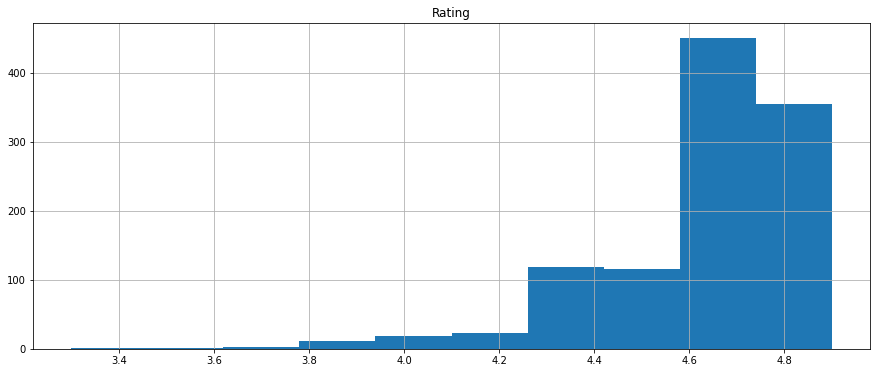

In [ ]:
amazon[['Rating']].hist(figsize=(15,6))

El presente histograma muestra la distribución de productos respecto al Rating. Se oberva que Sobre la mitad mantiene una puntuación superior a las 4,5 Estrellas.

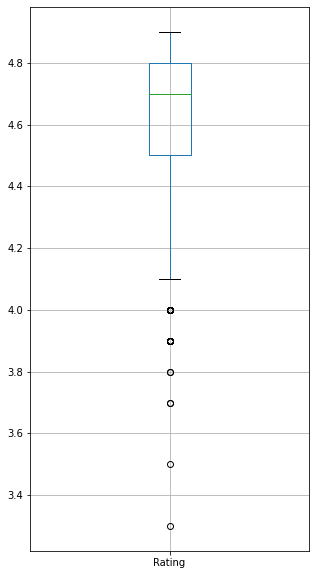

In [ ]:
 amazon.boxplot(column=['Rating'], figsize=(5,10))

A pesar de que que la mayor concentración de datos se encuentran partiendo del 4.5. Es importante destacar que existen puntos dispersos que se alejan de la distribución, por lo que se evidencia la existencia de outliers.

In [ ]:
import matplotlib.pyplot as plt

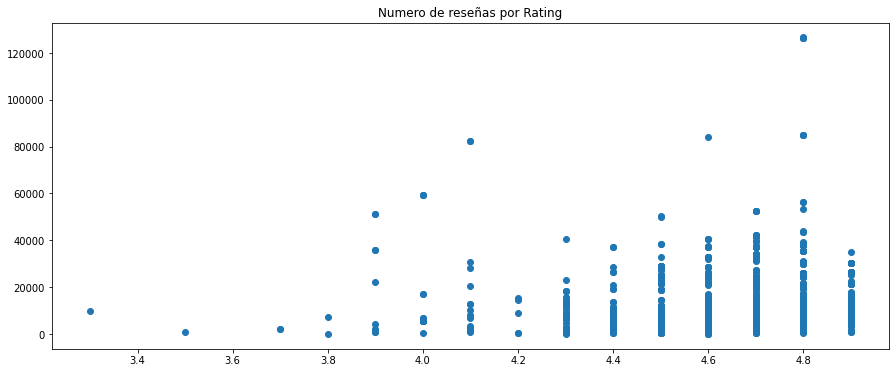

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Numero de reseñas por Rating')
plt.scatter(amazon['Rating'], amazon['Num_Customers_Rated'], label='Numero de reseñas')
plt.show()

Es evidente que mientras mayor puntuación tenga el producto es mayor es el número de reseñas que el mismo contiene

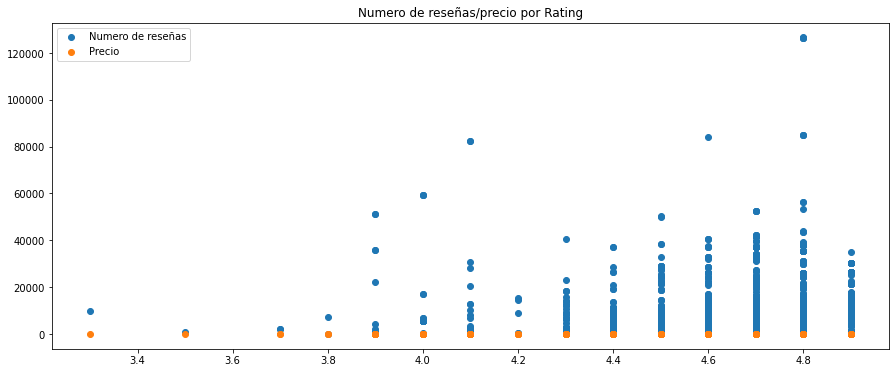

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Numero de reseñas/precio por Rating')
plt.scatter(amazon['Rating'], amazon['Num_Customers_Rated'], label='Numero de reseñas')
plt.scatter(amazon['Rating'], amazon['Price'], label='Precio')
plt.legend()
plt.show()

Tanto el número de reseñas como el precio son determinantes para la valoración del producto ya que el consumidor percibe que el precio del producto es adecuado o no y por otro lado también influye el total de reseñas en el proceso de compra y posterior valoración.

In [ ]:
import seaborn as sns

In [ ]:
(amazon.Rating)

0       4.7
1       4.4
2       4.6
3       4.8
4       4.7
       ... 
1089    4.8
1090    4.7
1091    4.7
1092    4.7
1093    4.8
Name: Rating, Length: 1094, dtype: float64

In [ ]:
amazon[10:21]

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
10,2010,11,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,526,28.05
11,2010,12,The Big Short: Inside the Doomsday Machine,Michael Lewis,4.7,3943,18.75
12,2010,13,Food Rules: An Eater's Manual,Michael Pollan,4.5,1760,0.35
13,2010,14,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,30700,20.98
14,2010,15,Dead in the Family (Sookie Stackhouse/True Blo...,Charlaine Harris,4.4,2214,12.59
15,2010,16,Sh*t My Dad Says,Justin Halpern,4.7,1397,0.99
16,2010,17,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1664,14.98
17,2010,18,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.7,3291,18.79
18,2010,19,Life,Keith Richards,4.5,3153,20.49
19,2010,20,Cutting for Stone,Abraham Verghese,4.6,5286,7.59


Muestra de la posición 11 a la posición 21

In [ ]:
amazon[:10]

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
5,2010,6,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,5312,9.52
6,2010,7,StrengthsFinder 2.0,Tom Rath,4.0,5517,15.79
7,2010,8,Mockingjay (The Hunger Games),Suzanne Collins,4.5,28849,8.79
8,2010,9,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.3,1484,12.44
9,2010,10,Publication Manual of the American Psychologic...,American Psychological Association,4.5,10383,15.99


Muestra las primeras 10 posiciones del raking contenidas en el dataset

In [ ]:
amazon[10:]

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
10,2010,11,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,526,28.05
11,2010,12,The Big Short: Inside the Doomsday Machine,Michael Lewis,4.7,3943,18.75
12,2010,13,Food Rules: An Eater's Manual,Michael Pollan,4.5,1760,0.35
13,2010,14,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,30700,20.98
14,2010,15,Dead in the Family (Sookie Stackhouse/True Blo...,Charlaine Harris,4.4,2214,12.59
...,...,...,...,...,...,...,...
1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


Muestra desde la posición 11 hasta la última.

In [ ]:
import numpy as np

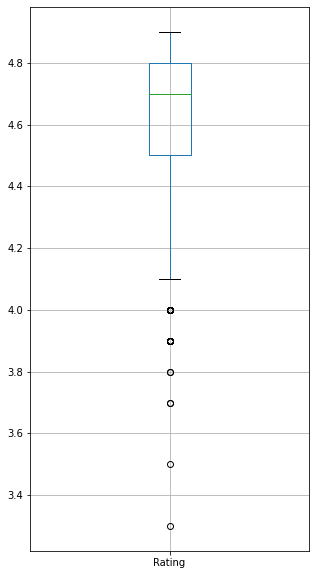

In [ ]:
amazon.boxplot(column=['Rating'], figsize=(5,10))

In [ ]:
np.unique(amazon.Rating, return_counts=True)

(array([3.3, 3.5, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
        4.8, 4.9]),
 array([  1,   1,   2,   2,   9,  18,  18,   5,  43,  76, 115, 192, 258,
        241, 113]))

In [ ]:
amazon

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...
1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


In [ ]:
amazon.Rating

0       4.7
1       4.4
2       4.6
3       4.8
4       4.7
       ... 
1089    4.8
1090    4.7
1091    4.7
1092    4.7
1093    4.8
Name: Rating, Length: 1094, dtype: float64

In [ ]:
X=amazon

In [ ]:
y=amazon.Rating

In [ ]:
X

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...
1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


In [ ]:
y

0       4.7
1       4.4
2       4.6
3       4.8
4       4.7
       ... 
1089    4.8
1090    4.7
1091    4.7
1092    4.7
1093    4.8
Name: Rating, Length: 1094, dtype: float64

In [ ]:
X = X.drop(columns=['Book_Title'])

In [ ]:
X = X.drop(columns=['Author'])

In [ ]:
X

,Year,Rank,Rating,Num_Customers_Rated,Price
0,2010,1,4.7,8475,17.24
1,2010,2,4.4,11516,9.99
2,2010,3,4.6,2201,17.80
3,2010,4,4.8,14772,14.97
4,2010,5,4.7,7949,0.02
...,...,...,...,...,...
1089,2020,96,4.8,13775,10.49
1090,2020,97,4.7,7923,20.98
1091,2020,98,4.7,9455,6.99
1092,2020,99,4.7,16340,5.68


In [ ]:
y

0       4.7
1       4.4
2       4.6
3       4.8
4       4.7
       ... 
1089    4.8
1090    4.7
1091    4.7
1092    4.7
1093    4.8
Name: Rating, Length: 1094, dtype: float64

In [ ]:
X.corr()

,Year,Rank,Rating,Num_Customers_Rated,Price
Year,1.000000,0.002647,0.298238,0.323219,-0.174865
Rank,0.002647,1.000000,-0.003316,-0.233854,-0.003929
Rating,0.298238,-0.003316,1.000000,0.135881,-0.177250
Num_Customers_Rated,0.323219,-0.233854,0.135881,1.000000,-0.104449
Price,-0.174865,-0.003929,-0.177250,-0.104449,1.000000


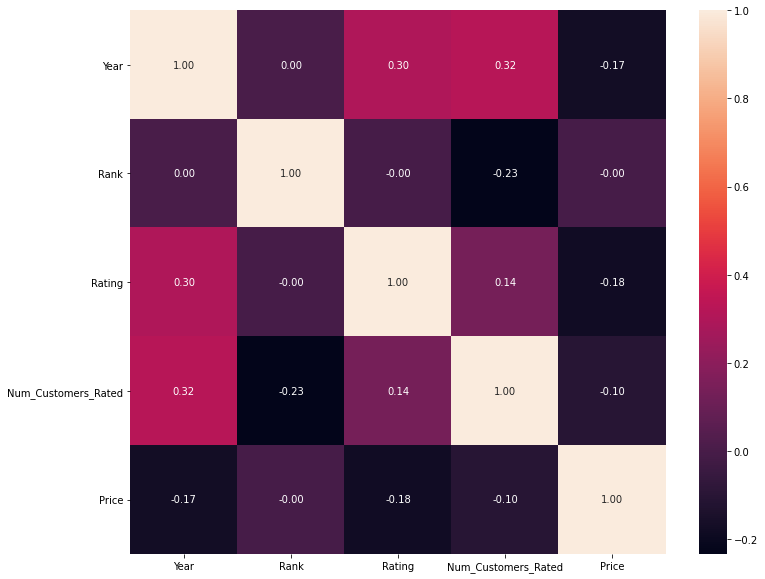

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr() ,annot = True, fmt='.2f')
plt.show()

In [ ]:
X

,Year,Rank,Rating,Num_Customers_Rated,Price
0,2010,1,4.7,8475,17.24
1,2010,2,4.4,11516,9.99
2,2010,3,4.6,2201,17.80
3,2010,4,4.8,14772,14.97
4,2010,5,4.7,7949,0.02
...,...,...,...,...,...
1089,2020,96,4.8,13775,10.49
1090,2020,97,4.7,7923,20.98
1091,2020,98,4.7,9455,6.99
1092,2020,99,4.7,16340,5.68


In [ ]:
y

0       4.7
1       4.4
2       4.6
3       4.8
4       4.7
       ... 
1089    4.8
1090    4.7
1091    4.7
1092    4.7
1093    4.8
Name: Rating, Length: 1094, dtype: float64

In [ ]:
X = X.drop(columns=['Rating'])

Sacamos los datos de la variable "y" que corresponde a nuestro Target Rating

In [ ]:
X

,Year,Rank,Num_Customers_Rated,Price
0,2010,1,8475,17.24
1,2010,2,11516,9.99
2,2010,3,2201,17.80
3,2010,4,14772,14.97
4,2010,5,7949,0.02
...,...,...,...,...
1089,2020,96,13775,10.49
1090,2020,97,7923,20.98
1091,2020,98,9455,6.99
1092,2020,99,16340,5.68


Comprobamos la no se encuentre en la matriz

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.describe()

,Year,Rank,Num_Customers_Rated,Price
count,1094.000000,1094.000000,1094.000000,1094.000000
mean,2015.001828,50.379342,14013.101463,10.850951
std,3.167769,28.831618,14303.567366,11.865798
min,2010.000000,1.000000,4.000000,0.010000
25%,2012.000000,25.250000,4489.500000,2.750000
50%,2015.000000,50.000000,10378.000000,8.980000
75%,2018.000000,75.000000,18024.750000,15.800000
max,2020.000000,100.000000,126619.000000,152.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Internamente toma el valor le resta la media y lo divide entre la varianza.

Dado que existen valores con escalas muy distintas los transformamos o bien llevamos a escalas mas parejas.

In [ ]:
from keras.layers import Dense

Creando el modelo a través de una función secuencial. Debido a que los elementos van a pasar secuencialmente y el modelo se construye con capa.
A través de la red neuronal podremos determinar o predecir a través de los datos del dataset el ranking de un Libro.

In [ ]:
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=[8]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
X_train.shape

(875, 4)

In [ ]:
import keras

A través de la Librería Keras construimos nuestra red neuronal

In [ ]:
from keras.layers import Dense

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=[4]))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics='mae')

In [ ]:
history = model.fit(X_train, y_train,validation_split=0.2, batch_size=15, epochs=50, verbose=1, )

Epoch 1/50
47/47 [==============================] - 1s 5ms/step - loss: 13.2745 - mae: 3.6370 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 2/50
47/47 [==============================] - 0s 1ms/step - loss: 13.1773 - mae: 3.6225 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 3/50
47/47 [==============================] - 0s 1ms/step - loss: 13.2823 - mae: 3.6381 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 13.1924 - mae: 3.6254 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 13.2487 - mae: 3.6329 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 13.2289 - mae: 3.6311 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 7/50
47/47 [==============================] - 0s 1ms/step - loss: 13.1749 - mae: 3.6232 - val_loss: 13.1961 - val_mae: 3.6263
Epoch 8/50
47/47 [==============================] - 0s 2ms/step - loss: 13.2

In [ ]:
import matplotlib.pyplot as plt

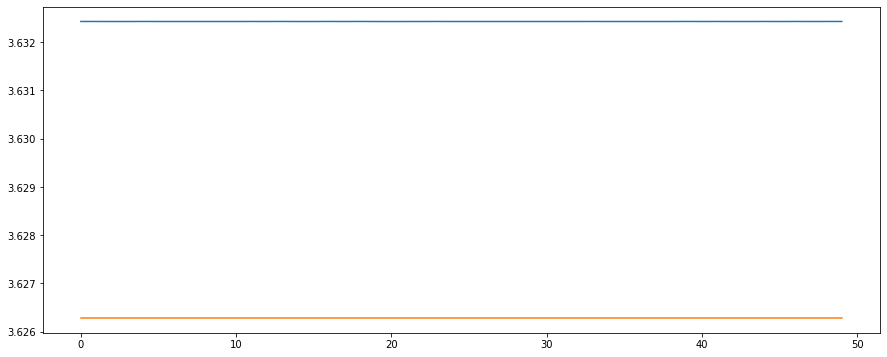

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred =(model.predict(X_test))

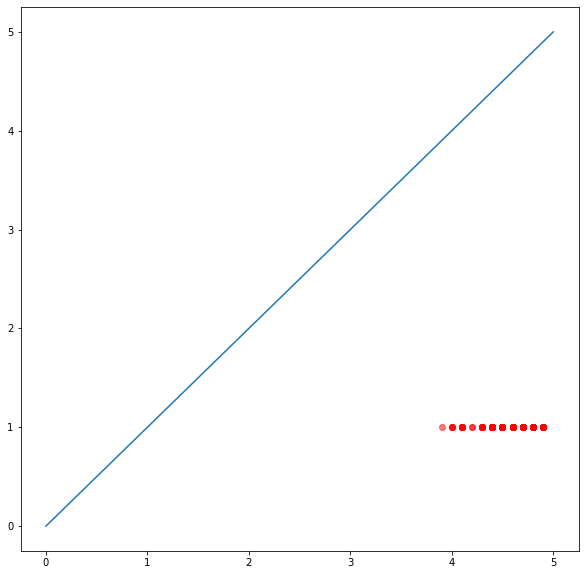

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter( y_test, y_pred, color='red', alpha=0.5)
_ = plt.plot([0,5], [0,5])
plt.show()

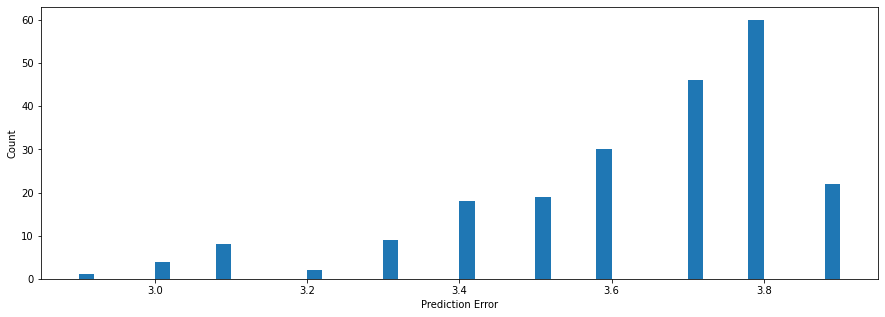

In [ ]:
error = abs(y_pred[0] - y_test)
plt.figure(figsize=(15,5))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")